# Telco Classification Project

<img src="telco_logo.png" title="telco_logo" width="400" height="200" />

In [46]:
import pandas as pd
import numpy as np
import os
from env import host, user, password
import acquire
import explore
import prepare

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                                  
import graphviz
from graphviz import Graph

from scipy import stats


## Project Goals

> - Find drivers for customer churn at Telco. Why are customers churning?

> - Construct a ML classification model that accurately predicts customer churn.

> - Document the process well enough to be presented or read like a report.

## Executive Summary 

> - I found that all of the classification models I created, LogisticRegression, DecisionTree, and RandomForest predicted the churn rate with an accuracy no higher than 81%.
> - I chose my Random Forest model with a max depth of 5 as my best model and got 82% accuracy rate for predicting churn when applied to the test split. This model outperformed my baseline score of 73% accuracy.
> - Some initial exploration and statistical testing revealed that engineering some new features like "add_ons" and "tenure_over_18_mos" might help my models predict with even more accuracy. However once applied to the models, they made little difference. 

## Key Takeaways
The following were the 5 most influential features to churn: (least to greatest)

> - paperless billing
> - auto pay
> - internet_type_None
> - Tenure over 18 months
> - 2 Yr Contract

# Data Acquisition

In [2]:
df = acquire.get_telco_data()
df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


# Data Preperation

Got familiar with data using Sequal ACE, Google Sheets, and Jupyter Lab

In [3]:
df.isna().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [6]:
df.describe()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,tenure,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,2.315633,1.872923,1.690473,0.162147,32.371149,64.761692
std,1.148907,0.737796,0.833755,0.368612,24.559481,30.090047
min,1.000000,1.000000,1.000000,0.000000,0.000000,18.250000
25%,1.000000,1.000000,1.000000,0.000000,9.000000,35.500000
50%,2.000000,2.000000,1.000000,0.000000,29.000000,70.350000
75%,3.000000,2.000000,2.000000,0.000000,55.000000,89.850000
max,4.000000,3.000000,3.000000,1.000000,72.000000,118.750000


Did not find nulls while going through data in jupyter notebook, but when looking through Google Sheets found 11 customers who have blank total charges, are under contract, but have not churned. However their tenure is 0 so we know they are new customers. Therefore, I will replace the blanks with 0's.

 <img src="11cases.png" title="telco_logo" width="300" height="100" />

Once I saw all fields had inputs it was time to clean up the data. 

In [13]:
df = prepare.clean_telco(df) # Detailed notes available inside prepare.py file
df.head()

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,auto_pay,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,add_ons
0,0,1,1,65,1,1,1,90.45,5957.90,0,0,0,1,0,0,0,0,1,1
1,0,0,0,54,0,0,0,45.20,2460.55,0,1,1,1,0,0,0,0,1,1
2,0,0,0,56,0,0,0,45.05,2560.10,0,1,0,1,0,0,0,0,1,1
3,0,1,1,20,0,0,1,39.40,825.40,0,1,1,1,0,0,0,0,1,1
4,0,1,0,72,1,1,1,85.15,6316.20,0,1,1,1,0,0,0,0,1,1


Once the DataFrame looked the way I wanted it to, it was time to explore the data. I went with a 20(test), 24(validate), 56(train) split. 

In [22]:
def train_validate_test_split(df, target, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [23]:
train, validate, test = train_validate_test_split(df, 'churn', seed=123)

In [24]:
train.shape, validate.shape, test.shape

((3943, 19), (1691, 19), (1409, 19))

# Data Exploration

In [25]:
train.isna().sum()

senior_citizen                       0
partner                              0
dependents                           0
tenure                               0
phone_service                        0
multiple_lines                       0
paperless_billing                    0
monthly_charges                      0
total_charges                        0
churn                                0
auto_pay                             0
gender_Male                          0
internet_service_type_DSL            0
internet_service_type_Fiber optic    0
internet_service_type_None           0
contract_type_Month-to-month         0
contract_type_One year               0
contract_type_Two year               0
add_ons                              0
dtype: int64

<AxesSubplot:>

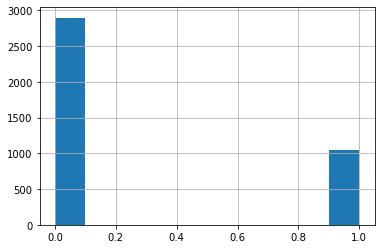

In [26]:
train.churn.hist()

<AxesSubplot:>

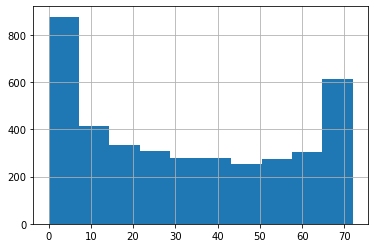

In [27]:
train.tenure.hist()

At this point I wanted to look for features that might stand out. So I created two new groups (Churned and Loyal customers). The following shows proportions for the overall group, churned group, and loyal group by column. 

The 5 features that stood out for me were:
- paperless_billing
- auto_pay
- internet_type_none
- Month-to-month
- Two Year 

In [29]:
churned_customers = df[df.churn == 1]
loyal_customers = df[df.churn == 0]

for column in df.columns:
    print(column)
    print("Population:")
    print(df[column].value_counts(normalize=True))
    print("Churned Customers:")
    print(churned_customers[column].value_counts(normalize=True))
    print("Loyal Customers:")
    print(loyal_customers[column].value_counts(normalize=True))
    print()
    print()

senior_citizen
Population:
0    0.837853
1    0.162147
Name: senior_citizen, dtype: float64
Churned Customers:
0    0.745318
1    0.254682
Name: senior_citizen, dtype: float64
Loyal Customers:
0    0.871279
1    0.128721
Name: senior_citizen, dtype: float64


partner
Population:
0    0.516967
1    0.483033
Name: partner, dtype: float64
Churned Customers:
0    0.642055
1    0.357945
Name: partner, dtype: float64
Loyal Customers:
1    0.528218
0    0.471782
Name: partner, dtype: float64


dependents
Population:
0    0.700412
1    0.299588
Name: dependents, dtype: float64
Churned Customers:
0    0.825575
1    0.174425
Name: dependents, dtype: float64
Loyal Customers:
0    0.655199
1    0.344801
Name: dependents, dtype: float64


tenure
Population:
1     0.087037
72    0.051399
2     0.033792
3     0.028397
4     0.024989
        ...   
28    0.008093
39    0.007951
44    0.007241
36    0.007099
0     0.001562
Name: tenure, Length: 73, dtype: float64
Churned Customers:
1     0.203317
2    

Because 2 of the 5 features have to do with contract types, I started thinking of tenure. So I compared average tenure for different groups. 

In [30]:
# Compared population vs churned vs loyal
df.tenure.mean(), churned_customers.tenure.mean(), loyal_customers.tenure.mean()

(32.37114865824223, 17.979133226324237, 37.56996521066873)

In [38]:
# 2 yr contract
df[df['contract_type_Two year'] == 1].churn.mean()
# Very low churn rate

0.02831858407079646

In [39]:
df[df['contract_type_Two year'] == 1].tenure.mean()
# Long tenure

56.73510324483776

In [40]:
# 1yr contract
df[df['contract_type_One year'] == 1].churn.mean()
# Low churn rate

0.11269517990495587

In [41]:
df[df['contract_type_One year'] == 1].tenure.mean()
# Almost 4 yrs tenure

42.044806517311606

In [42]:
# Month-to-month
df[df['contract_type_Month-to-month'] == 1].churn.mean()
# High churn rate

0.4270967741935484

In [43]:
df[df['contract_type_Month-to-month'] == 1].tenure.mean()
# Less than 2 yrs tenure

18.036645161290323

In [44]:
# Has 1 or 2 yr contract
df[df['contract_type_Month-to-month'] == 0].churn.mean()
# Very low churn rate

0.06755050505050506

In [45]:
df[df['contract_type_Month-to-month'] == 0].tenure.mean()
# Over 4 yrs tenure

49.904671717171716

This got me thinking... "Is tenure(continuous) independent of churn?" and also "Is having a 2 year contract(categorical) independent of churn?"

To make tenure categorical I made a new column called "over_18_mos". Since this was the average tenure for month to month customers and also churned customers, I wanted to see how this would impact stats testing. 

# Chi2 Test

> - **Hypothesis 1 -**
> - alpha = .05
> - $H_0$: Tenure over 18 months is independent of churn  
> - $H_a$: Tenure over 18 months is not independent of churn
> - Outcome: I rejected the Null Hypothesis; Therefore we reject that tenure over 18 months is independent of churn. 

In [53]:
a = 0.05

In [47]:
df['over_18_mos'] = (df.tenure >= 18)
df["over_18_mos"] = df['over_18_mos'].replace(to_replace = [True,False],value = [1,0])
df.head()
#Added column

,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,paperless_billing,monthly_charges,total_charges,churn,auto_pay,gender_Male,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,add_ons,over_18_mos
0,0,1,1,65,1,1,1,90.45,5957.90,0,0,0,1,0,0,0,0,1,1,1
1,0,0,0,54,0,0,0,45.20,2460.55,0,1,1,1,0,0,0,0,1,1,1
2,0,0,0,56,0,0,0,45.05,2560.10,0,1,0,1,0,0,0,0,1,1,1
3,0,1,1,20,0,0,1,39.40,825.40,0,1,1,1,0,0,0,0,1,1,1
4,0,1,0,72,1,1,1,85.15,6316.20,0,1,1,1,0,0,0,0,1,1,1


In [48]:
train, validate, test = train_validate_test_split(df, 'churn', seed=123)
train.shape, validate.shape, test.shape
# Redid my splits

((3943, 20), (1691, 20), (1409, 20))

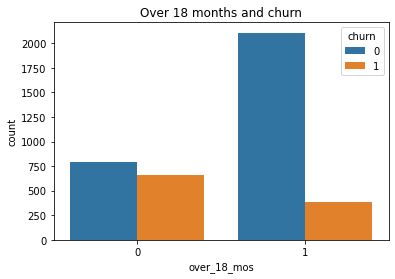

In [49]:
sns.countplot(data = train, hue = "churn", x = "over_18_mos")
plt.title("Over 18 months and churn")
plt.show()

In [50]:
observed = pd.crosstab(train.over_18_mos,train.churn,margins = True)
observed

churn,0,1,All
over_18_mos,,,
0,790,657,1447
1,2107,389,2496
All,2897,1046,3943


In [51]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 790  657 1447]
 [2107  389 2496]
 [2897 1046 3943]]
---
Expected

[[1063.1394877  383.8605123 1447.       ]
 [1833.8605123  662.1394877 2496.       ]
 [2897.        1046.        3943.       ]]
---

chi^2 = 417.8843
p     = 0.0000


In [54]:
if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypthesis")

We reject the null hypothesis


Therefore we reject that tenure over 18 months is independent of churn. 

> - **Hypothesis 2 -**
> - alpha = .05
> - $H_0$: Having a 2 year contract is independent of churn  
> - $H_a$: Having a 2 year contract is not independent of churn
> - Outcome: I rejected the Null Hypothesis; Therefore we reject that having a 2 year contract is independent of churn. 

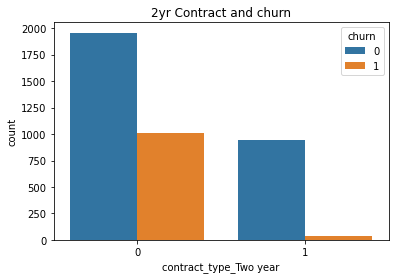

In [55]:
sns.countplot(data = train, hue = "churn", x = "contract_type_Two year")
plt.title("2yr Contract and churn")
plt.show()

In [56]:
observed = pd.crosstab(train["contract_type_Two year"], train.churn, margins = True)
observed

churn,0,1,All
contract_type_Two year,,,
0,1957,1012,2969
1,940,34,974
All,2897,1046,3943


In [57]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1957 1012 2969]
 [ 940   34  974]
 [2897 1046 3943]]
---
Expected

[[2181.38295714  787.61704286 2969.        ]
 [ 715.61704286  258.38295714  974.        ]
 [2897.         1046.         3943.        ]]
---

chi^2 = 352.2173
p     = 0.0000


In [58]:
if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypthesis")

We reject the null hypothesis


Therefore we reject that having a 2 year contract is independent of churn. 

> - **Hypothesis 3 -**
> - alpha = .05
> - $H_0$: Having no internet is independent of churn  
> - $H_a$: Having no internet is not independent of churn
> - Outcome: I rejected the Null Hypothesis; Therefore we reject that having no internet is independent of churn. 

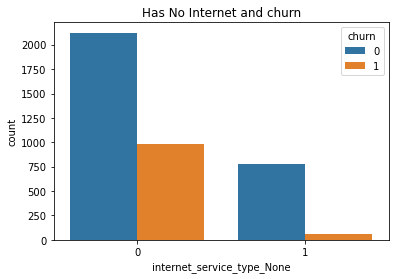

In [91]:
sns.countplot(data = train, hue = "churn", x = "internet_service_type_None")
plt.title("Has No Internet and churn")
plt.show()

In [61]:
observed = pd.crosstab(train["internet_service_type_None"], train.churn, margins = True)
observed

churn,0,1,All
internet_service_type_None,,,
0,2122,983,3105
1,775,63,838
All,2897,1046,3943


In [62]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[2122  983 3105]
 [ 775   63  838]
 [2897 1046 3943]]
---
Expected

[[2281.30484403  823.69515597 3105.        ]
 [ 615.69515597  222.30484403  838.        ]
 [2897.         1046.         3943.        ]]
---

chi^2 = 197.3115
p     = 0.0000


In [63]:
if p < a:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypthesis")

We reject the null hypothesis


Therefore we reject that having no internet is independent of churn. 

# Takeaways
- Before the 18 month mark for tenure, there's almost a 50/50 chance a customer will churn. That declines significantly after the 18 month mark. 
- Customers who agree to a 2 yr contract are significantly less likely to churn and evidence suggests they might renew.
- I'm curious to see if signing up for DSL vs Fiber has more or less of an effect compared to having internet or not. 

# Models

# Decision Tree

In [64]:
X_train = train.drop(columns=['churn'])
y_train = train.churn

X_validate = validate.drop(columns=['churn'])
y_validate = validate.churn

X_test = test.drop(columns=['churn'])
y_test = test.churn

In [65]:
# The mode is a great baseline
baseline = y_train.mode()

# Produce a boolean array with True representing a match between the baseline prediction and reality
matches_baseline_prediction = y_train == 0

baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [66]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(X_train, y_train)

In [67]:
y_predictions = clf.predict(X_train)

In [68]:
import graphviz
from graphviz import Graph

dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_decision_tree', view=True)



'telco_decision_tree.pdf'

In [69]:

# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 19):
    # Make the model
    tree = DecisionTreeClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    tree = tree.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = tree.score(X_train, y_train)
    
    out_of_sample_accuracy = tree.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
metric_table = pd.DataFrame(metrics)
metric_table["difference"] = metric_table.train_accuracy - metric_table.validate_accuracy
metric_table

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.760588,0.769367,-0.008779
1,3,0.792037,0.793613,-0.001577
2,4,0.795334,0.778829,0.016504
3,5,0.797109,0.781195,0.015914
4,6,0.812326,0.780012,0.032314
5,7,0.825514,0.782969,0.042545
6,8,0.841238,0.779420,0.061817
7,9,0.860766,0.761088,0.099678
8,10,0.882577,0.749261,0.133316
9,11,0.904388,0.749852,0.154535


In [70]:
# max depth of 3 appears to be the best with 0.792 train and 0.794 validate accuracy

# Random Forest

In [71]:
baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 2)}")

Baseline accuracy: 0.73


In [72]:
# Let's continue getting loopy, so we can compare in-sample to out-of-sample
metrics = []

for i in range(2, 19):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
metric_table = pd.DataFrame(metrics)
metric_table["difference"] = metric_table.train_accuracy - metric_table.validate_accuracy
metric_table

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.781892,0.784151,-0.002259
1,3,0.793051,0.794205,-0.001154
2,4,0.794826,0.797753,-0.002927
3,5,0.800406,0.801301,-0.000895
4,6,0.811565,0.798344,0.013221
5,7,0.820949,0.798344,0.022604
6,8,0.838701,0.800710,0.037992
7,9,0.861780,0.792431,0.069350
8,10,0.888410,0.794205,0.094205
9,11,0.923916,0.793022,0.130894


In [73]:
# max depth of 5 appears to be the best with 80 train and 80.1 validate accuracy

# Logistic Regression

In [74]:
baseline_accuracy = matches_baseline_prediction.mean()
print(f"Baseline accuracy: {round(baseline_accuracy, 3)}")

Baseline accuracy: 0.735


In [75]:
# All features, all default hyperparameters
logit = LogisticRegression(random_state=123)

logit.fit(X_train, y_train)

y_pred = logit.predict(X_train)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.3f}'
     .format(logit.score(X_train, y_train)))

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.799


In [ ]:
# At this point wanted to play with different features. These were selected based on the first 3 levels of a decision tree made prior. 

In [76]:
features = ['contract_type_Month-to-month', 'internet_service_type_Fiber optic', 'contract_type_One year']

logit1 = LogisticRegression(random_state=123)

logit1.fit(X_train[features], y_train)

y_pred = logit1.predict(X_train[features])

accuracy = logit1.score(X_train[features], y_train)

print("Model trained on month_to_month, Fiber_optic, and One_year_contract")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

Model trained on month_to_month, Fiber_optic, and One_year_contract
Accuracy of Logistic Regression classifier on training set: 0.76


In [77]:
features = ['contract_type_Two year']

logit2 = LogisticRegression(random_state=123)

logit2.fit(X_train[features], y_train)

y_pred = logit2.predict(X_train[features])

accuracy = logit2.score(X_train[features], y_train)

print("Model trained on Two_year_contract")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

Model trained on Two_year_contract
Accuracy of Logistic Regression classifier on training set: 0.73


In [78]:
# Decided to try my golden features

In [80]:
features = ['contract_type_Two year', 'over_18_mos', 'internet_service_type_None']

logit3 = LogisticRegression(random_state=123)

logit3.fit(X_train[features], y_train)

y_pred = logit3.predict(X_train[features])

accuracy = logit3.score(X_train[features], y_train)

print("Model trained on Two_year_contract, over_18_mos, and internet_service_type_None")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

Model trained on Two_year_contract, over_18_mos, and internet_service_type_None
Accuracy of Logistic Regression classifier on training set: 0.76


# Validate

In [81]:
# Logistic Regression
# All features, all default hyperparameters
logit = LogisticRegression(random_state=123)

logit.fit(X_validate, y_validate)

y_pred = logit.predict(X_validate)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on validate set: {:.3f}'
     .format(logit.score(X_validate, y_validate)))

Model trained on all features
Accuracy of Logistic Regression classifier on training set: 0.805


In [83]:
# Random Forest with a max depth of 5
# Make the model
forest1 = RandomForestClassifier(max_depth=5, random_state=123)

# Fit the model
forest1 = forest1.fit(X_validate, y_validate)

# Use the model
# We'll evaluate the model's performance on test
y_predictions = forest1.predict(X_validate)
y_pred_proba = forest1.predict_proba(X_validate)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_validate, y_predictions, output_dict=True)
print("Random Forest with max 5 depth")
pd.DataFrame(report)

Random Forest with max 5 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.827266,0.713793,0.807806,0.770530,0.797136
recall,0.933172,0.461024,0.807806,0.697098,0.807806
f1-score,0.877034,0.560217,0.807806,0.718625,0.792911
support,1242.000000,449.000000,0.807806,1691.000000,1691.000000


In [85]:
# Decision tree with a max depth of 3
tree = DecisionTreeClassifier(max_depth=3, random_state=123)

    
tree = tree.fit(X_validate, y_validate)
accuracy = tree.score(X_validate, y_validate)
accuracy

0.7989355410999409

In [86]:
# Random Forest with a max of 5 had best accuracy

# Test

In [87]:

# Make the model
forest1 = RandomForestClassifier(max_depth=5, random_state=123)

# Fit the model
forest1 = forest1.fit(X_test, y_test)

# Use the model
# We'll evaluate the model's performance on test
y_predictions = forest1.predict(X_test)
y_pred_proba = forest1.predict_proba(X_test)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_test, y_predictions, output_dict=True)
print("Random Forest with max 5 depth")
pd.DataFrame(report)

Random Forest with max 5 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.850358,0.706485,0.82044,0.778422,0.812169
recall,0.916908,0.553476,0.82044,0.735192,0.820440
f1-score,0.882380,0.620690,0.82044,0.751535,0.812918
support,1035.000000,374.000000,0.82044,1409.000000,1409.000000


In [88]:
import prepare

In [89]:
df = acquire.get_telco_data()
merged = X_test.merge((df.customer_id), left_index=True, right_index=True, how='left')
customer_id = merged.customer_id
probability = pd.DataFrame(y_pred_proba, columns= ['no_churn_prob', 'churn_prob'])
prediction = pd.DataFrame(y_predictions, columns= ['churn_pred'])
final_pred = pd.concat([probability, prediction], axis=1)

customer = pd.DataFrame(customer_id)
customer.reset_index(drop=True, inplace=True)
final = pd.concat([final_pred, customer], axis=1)
final["churn_pred"] = final.churn_pred.replace(to_replace = [1, 0],value = ["Yes","No"])

final.to_csv('churn_predictions_df.csv')

# Summary

## Key Takeaways
The following were the most influential features to churn: (least to greatest)

   - paperless billing
   - auto pay
   - internet_type_None
   - Tenure over 18 months
   - 2 Yr Contract

## Recommendations
- Let's get customers committed. Let's help them reach past the 18 month mark.
- We can try implementing some sort of membership program to new and existing customers to get them to feel more connected and commited to us. 

# If given more time...
- I'd like to explore features like paperless billing and autopay more thoroughly. They seem to have potential in helping discover reasons for churning. 
- I'd like to switch my focus to recall instead of accuracy when comparing models, as predictions with heavy recalls have the potential of helping us better prevent actual churning.
- I'd also like to explore the differences between fiber and dsl, as those features also show promise in helping predict churning. 
